### Breast Cancer Wisconsin (Diagnostic) - Feature Selection
###### [Mission] feature selection and data visualization<br>[Data]<br>data: various features for diagnostic(radius, texture, perimeter...)

### Prepare data

In [221]:
# base
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# time
import time
from subprocess import check_output
print(check_output(["ls", "C:/Users/1004/git/kaggle/Wisconsin"]).decode("utf8"))

# warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning, feature_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA

# acquire data
data = pd.read_csv('C:/Users/1004/git/kaggle/Wisconsin/data.csv')

data.csv



In [222]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [223]:
print(data.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


In [224]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

###### * Note(feature type)<br>Categorical = diagnosis <br> Continous = radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean...fractal_dimension_worst

In [225]:
# check null, type
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [226]:
y = data.diagnosis

# M or B
list = ['id', 'diagnosis']
x = data.drop(list, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


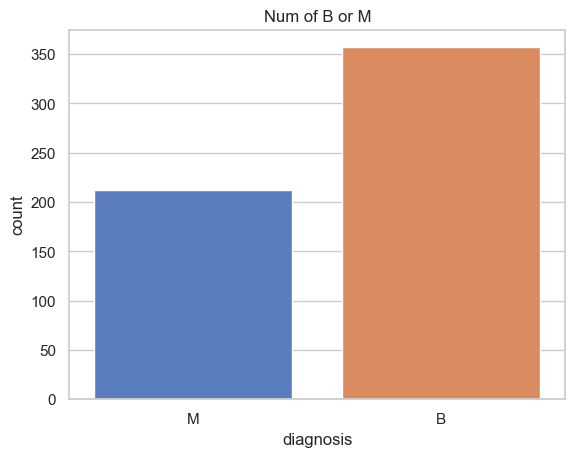

In [227]:
ax = sns.countplot(y, label = "Count")
ax.set_title("Num of B or M")
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

In [228]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Analyze by visualizing data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

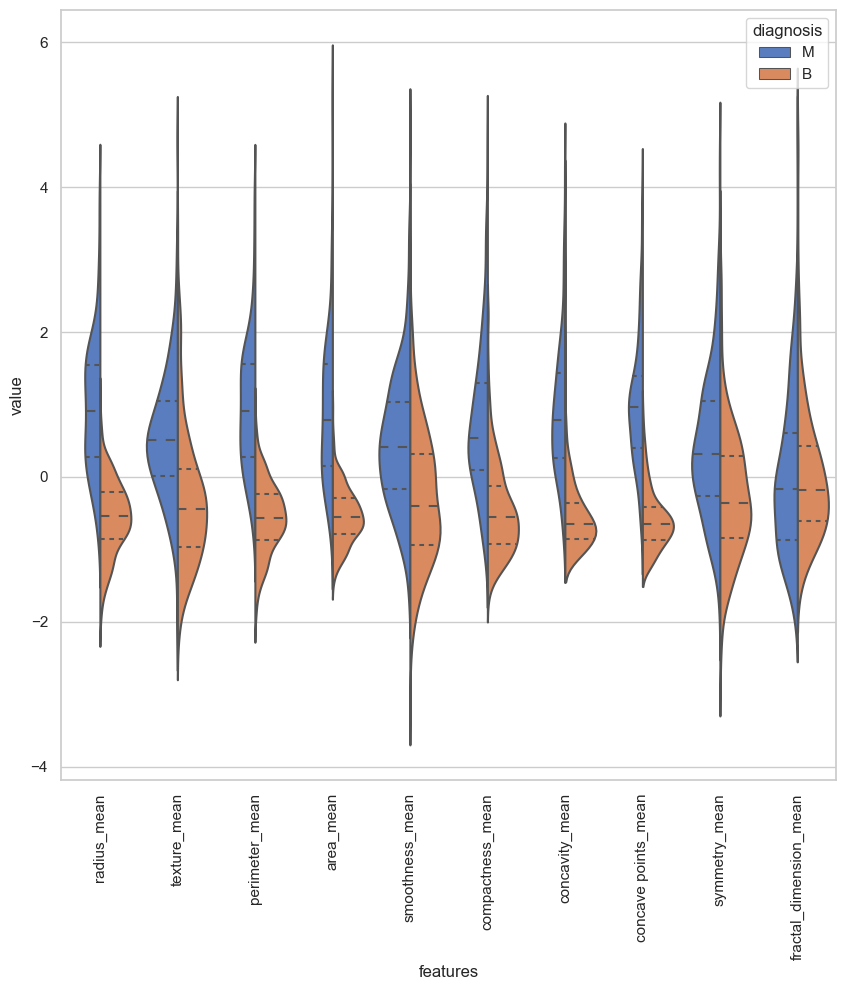

In [229]:
# standardization
data_n_2 = (x - x.mean()) / (x.std())

# first ten features
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")
plt.figure(figsize = (10, 10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)

###### * Note(interpretation graph)<br>1) median of the M and B looks like separated so it can be good for classification(texture_mean...)<br>2) median of the M and B does not looks like separated so it does not gives good information for classification(fractal_dimension_mean...)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

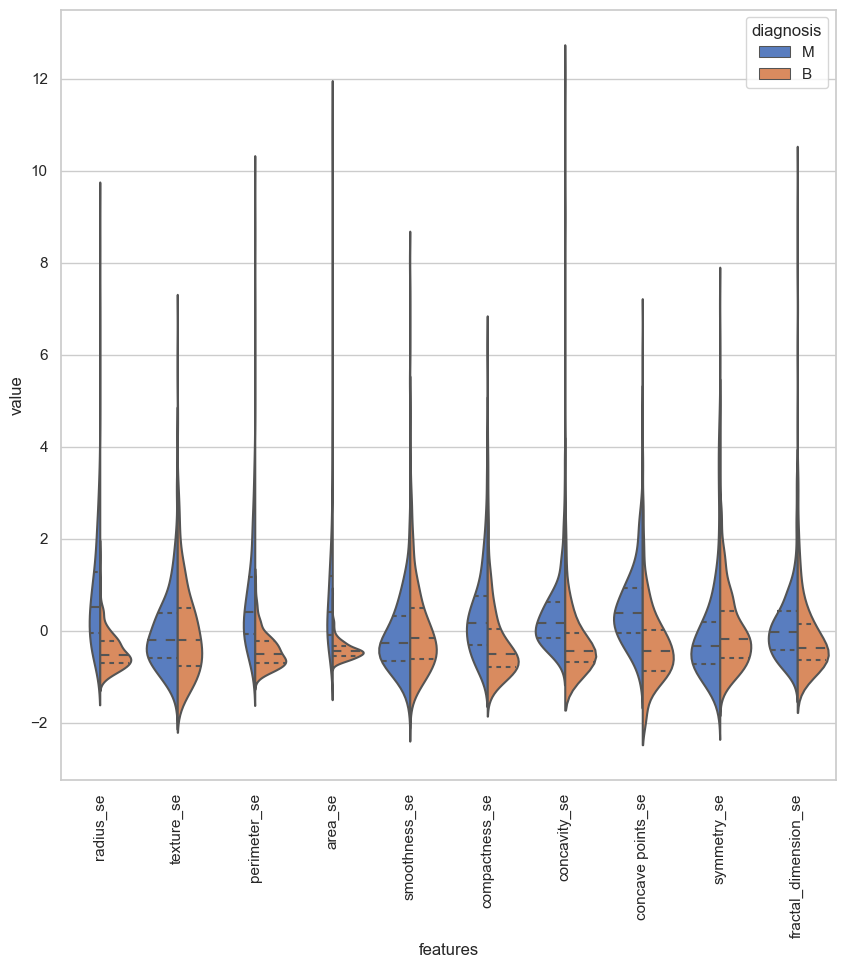

In [230]:
# second ten features
data = pd.concat([y, x_n_2.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")
plt.figure(figsize = (10, 10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

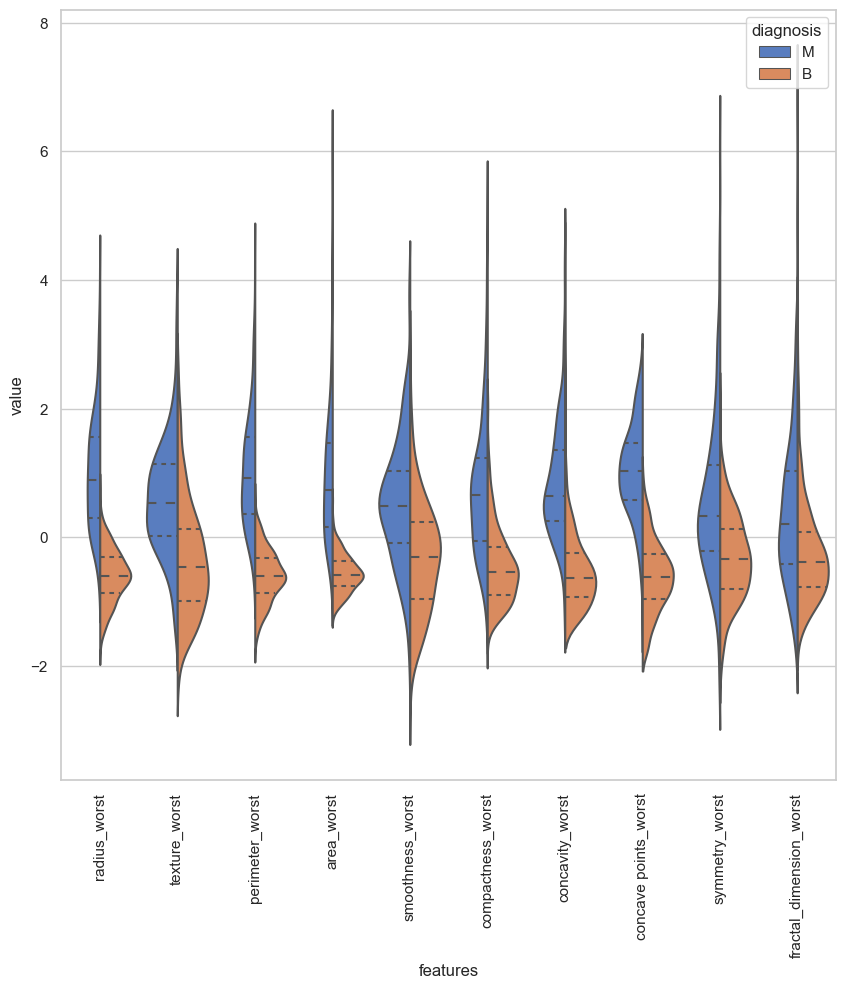

In [231]:
# third ten features
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")
plt.figure(figsize = (10, 10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

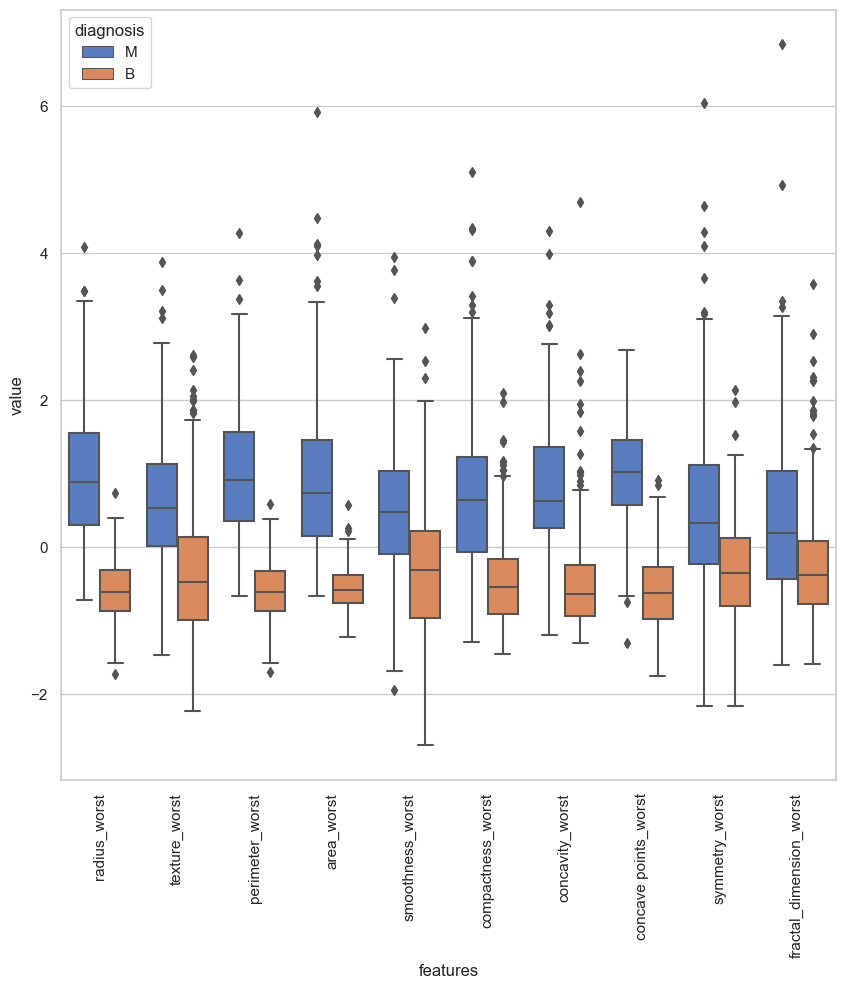

In [232]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data)
plt.xticks(rotation = 90)

###### * Note(interpretation graph)<br>- variable of concavity_worst and concave point_worst looks like simillar but how can we decide whether they are correlated with each other or not<br>(basically if the features are correlated with each other we can drop one of them)<br> - so, compare two features

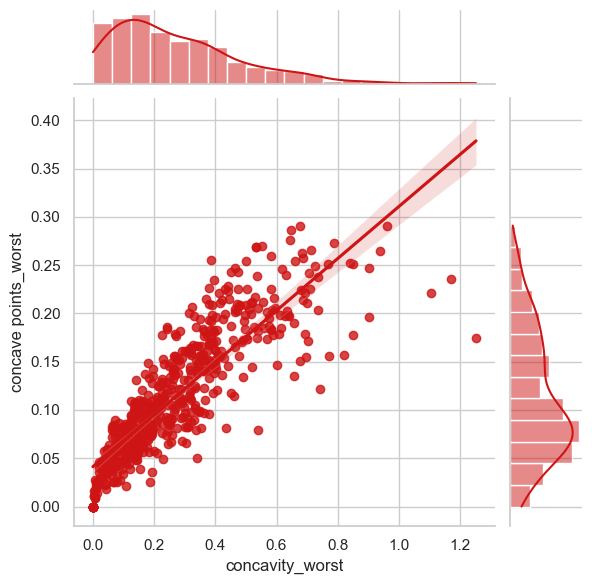

In [233]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind = "reg", color = "#ce1414")

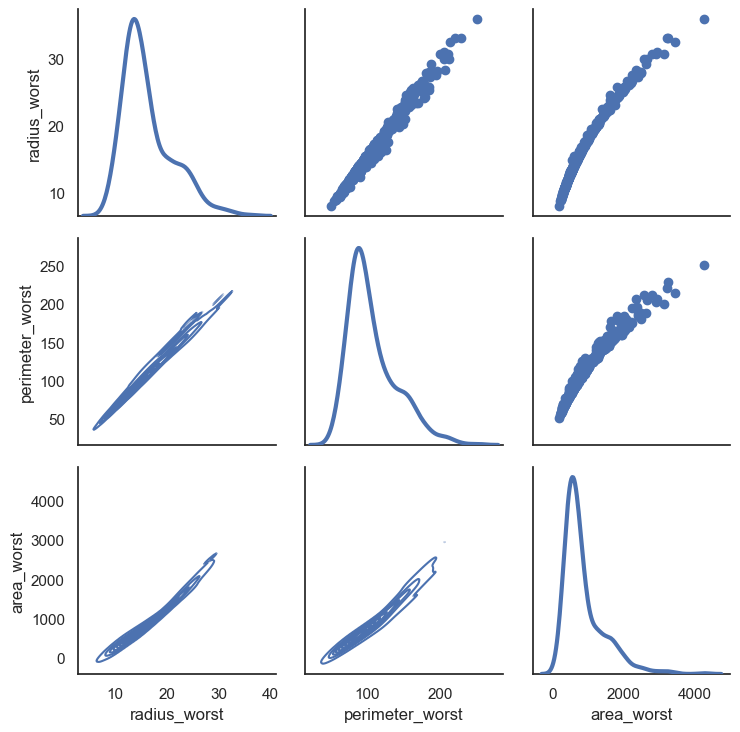

In [234]:
sns.set(style = "white")
df = x.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]
g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, camp = "Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

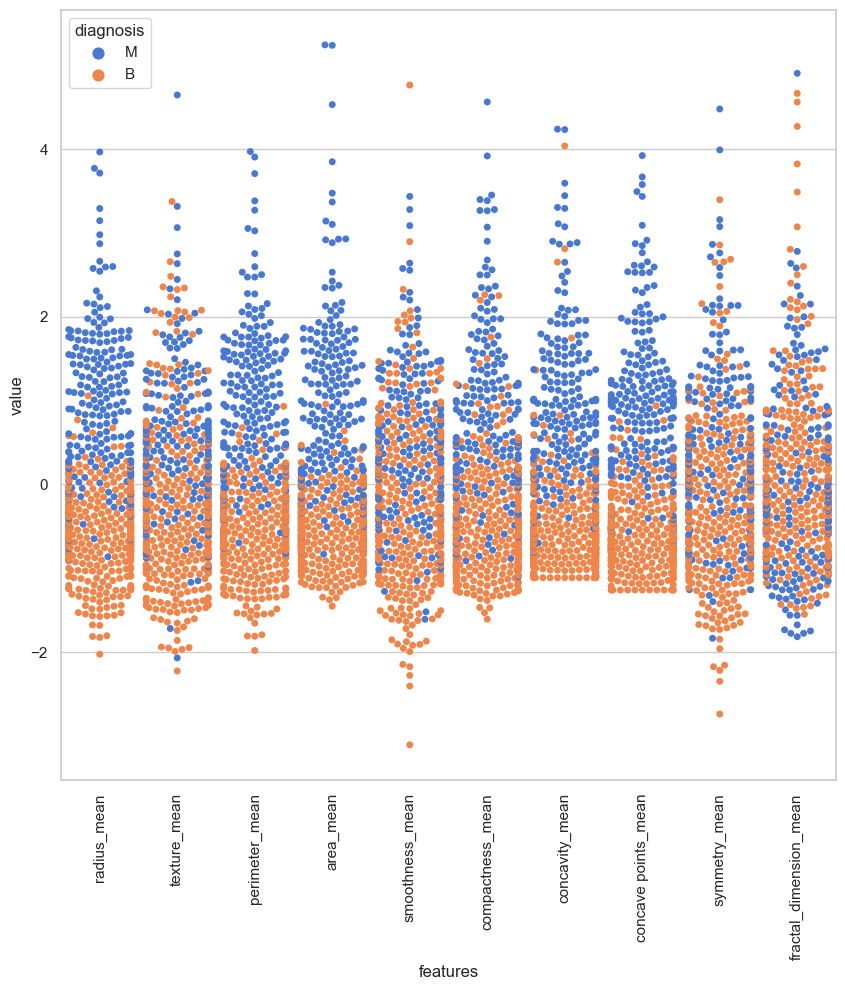

In [235]:
sns.set(style = "whitegrid", palette = "muted")
data_dia = y
data = x

# standardization
data_n_2 = (data - data.mean()) / (data.std())

data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "features", value_name = "value")
plt.figure(figsize = (10, 10))
tic = time.time()
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data)

plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

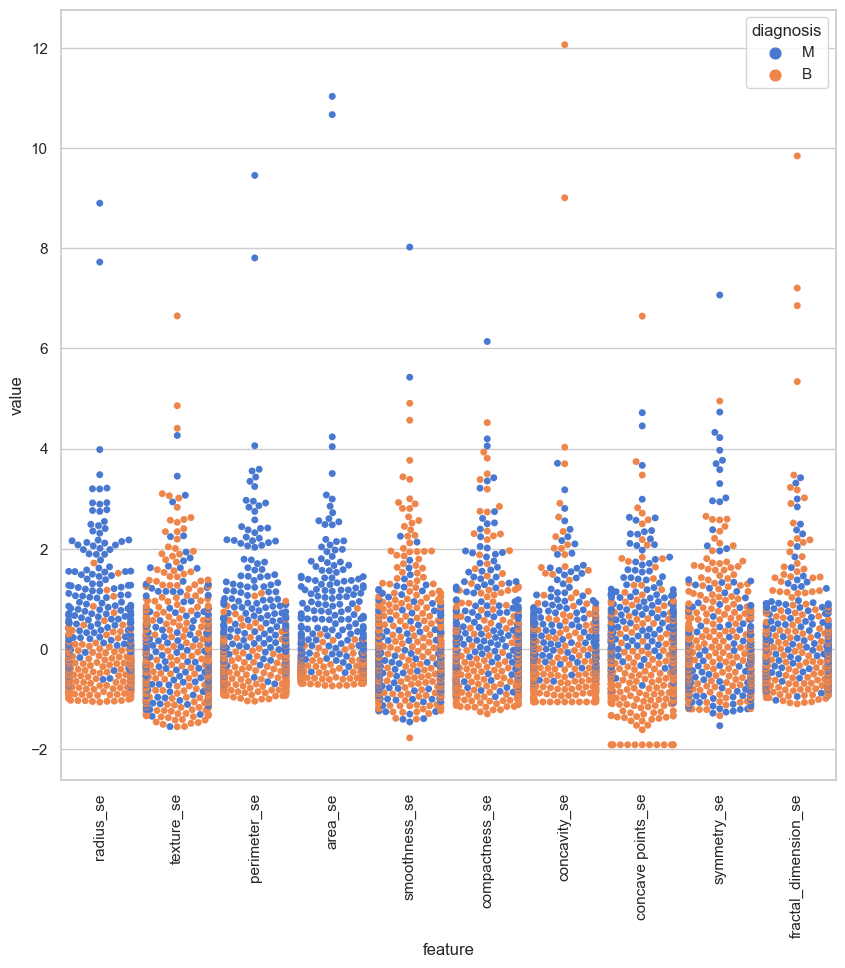

In [236]:
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "feature", value_name = "value")
plt.figure(figsize = (10, 10))
sns.swarmplot(x = "feature", y = "value", hue = "diagnosis", data = data)
plt.xticks(rotation = 90)

swarm plot time:  9.31880807876587  s


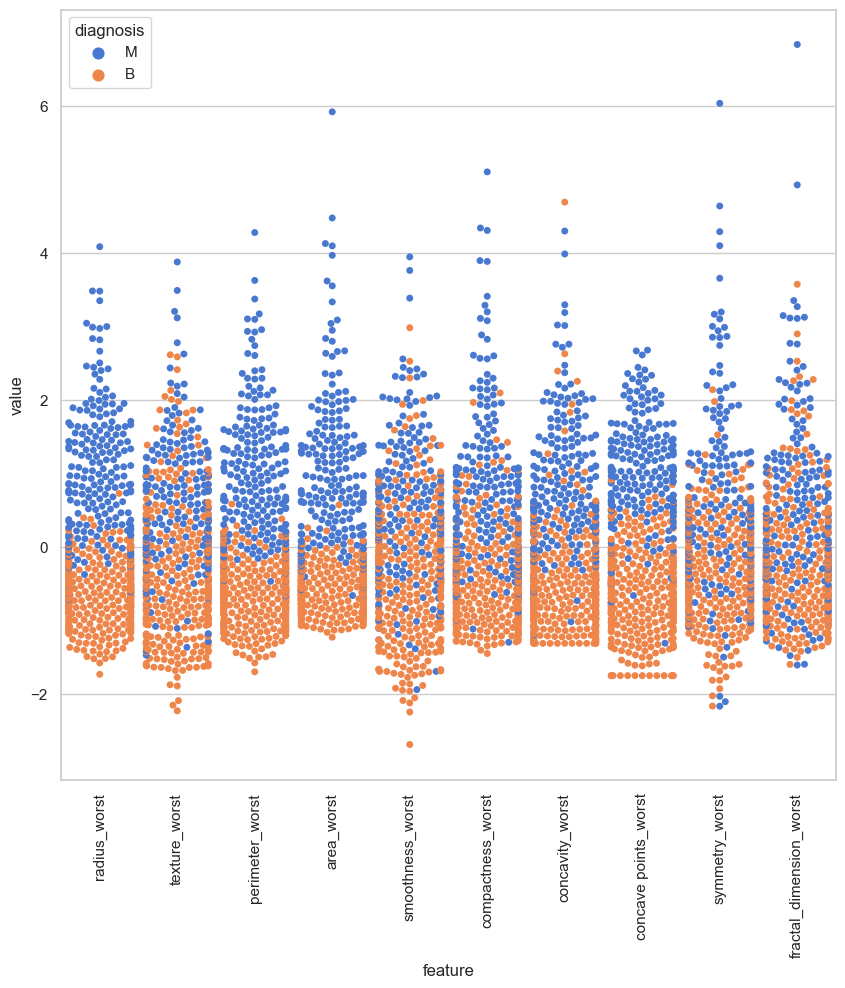

In [237]:
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name = "feature", value_name = "value")
plt.figure(figsize = (10, 10))
sns.swarmplot(x = "feature", y = "value", hue = "diagnosis", data = data)
toc = time.time()
plt.xticks(rotation = 90)
print("swarm plot time: ", toc-tic, " s")

<AxesSubplot:>

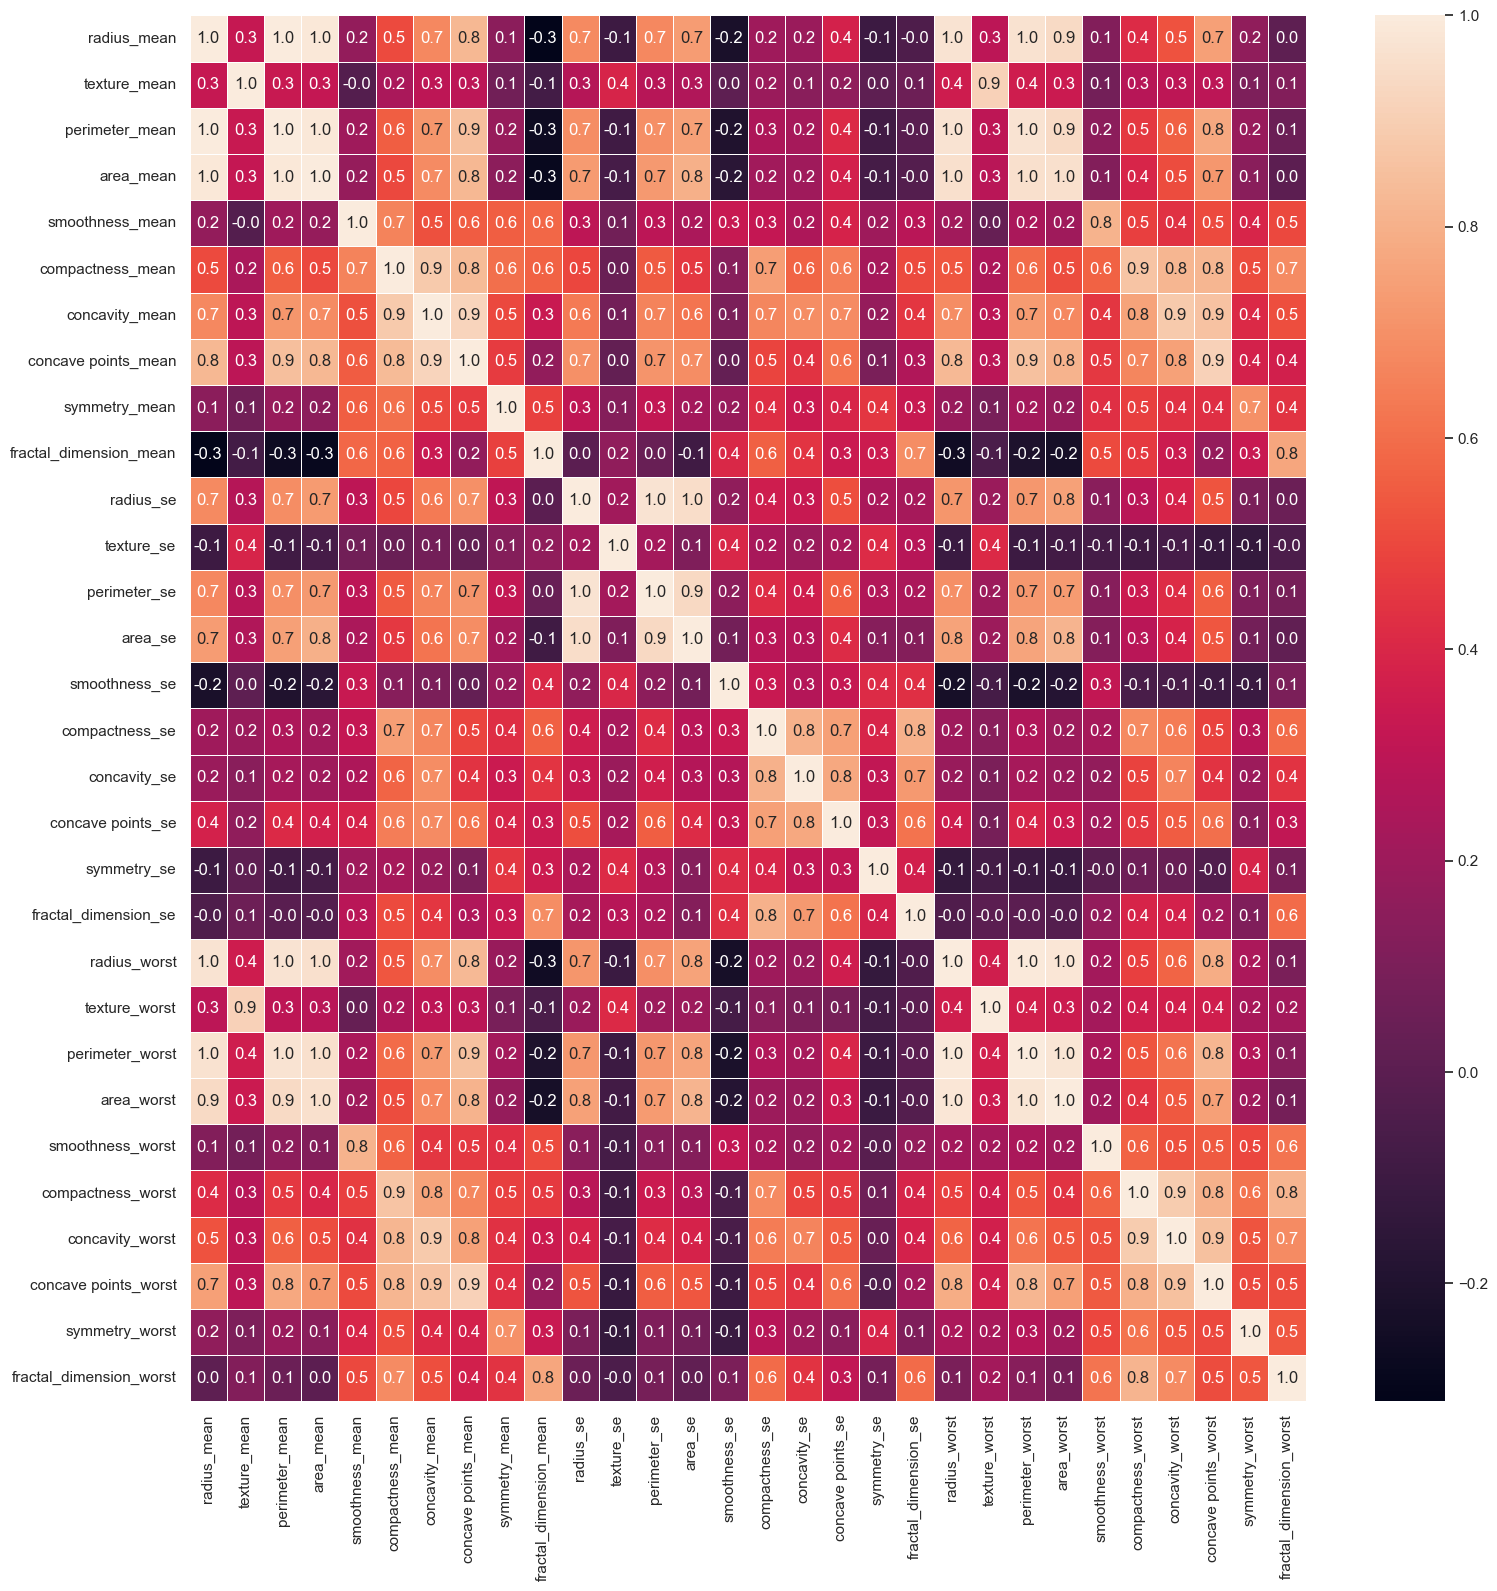

In [238]:
# correlation map
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(x.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
# annot = correlation value(in map)

### Feature selection

<h6>
* Note<br>
1) radius, perimeter, area are correlated with each other(map heat figure)<br>
1-2) use only area_mean, area_se, area_worst(swarm plot)<br>
2) compacthness, concavity, concave points are correlated with each other<br>
2-2) use only concavity_mean, concavity_se, concavity_worst<br>
3) texture_mean and texture_worst are corralated<br>
3-2) use only texture_mean<br>
4) area_worst and area_mean are correlated<br>
4-2) use only area_mean
</h6>

In [239]:
# 1) feature selection with correalation and randomforest classification
drop_list1 = ['perimeter_mean', 'radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concave points_worst', 'compactness_se', 'concave points_se', 'texture_worst', 'area_worst']
x_1 = x.drop(drop_list1, axis = 1)
x_1.head()


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<AxesSubplot:>

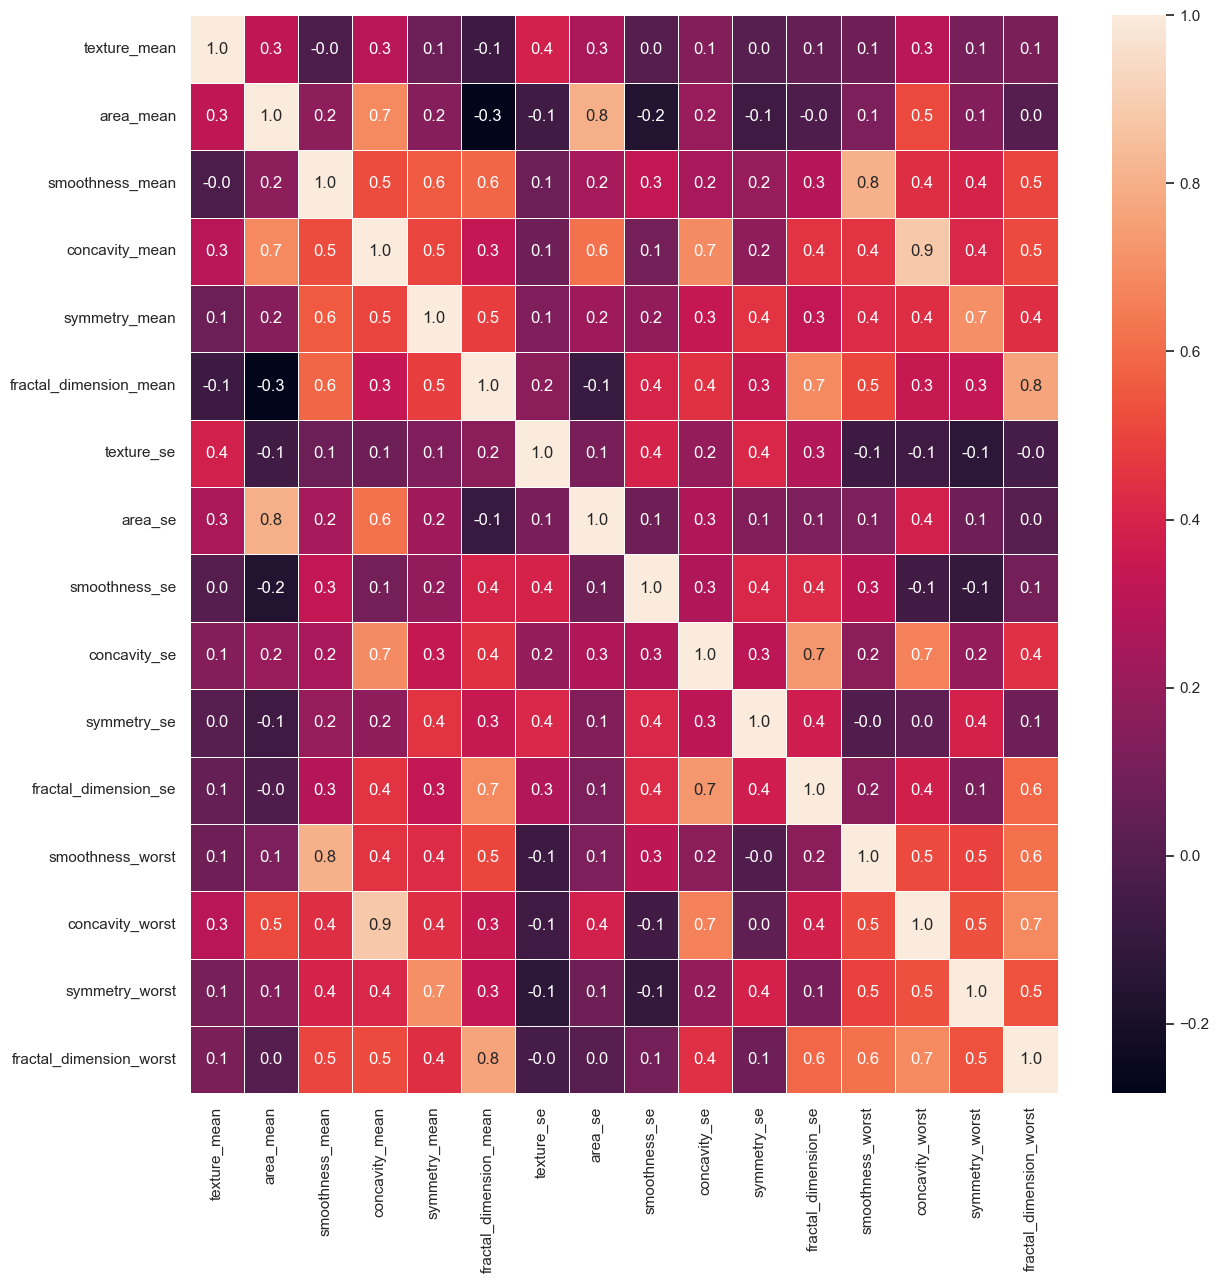

In [240]:
# correlation map
f, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(x_1.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)

Accuracy is:  0.9649122807017544


<AxesSubplot:>

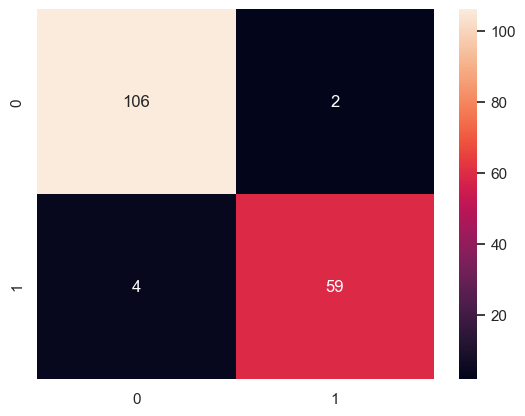

In [241]:
# split data
x_train, x_test, y_train, y_test  = train_test_split(x_1, y, test_size = 0.3, random_state = 42)

# randomforest classifier with n_estimators = 10(default)
ranfor = RandomForestClassifier(random_state = 43)
ranfor.fit(x_train, y_train)
y_pred = ranfor.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy is: ', acc)
cf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat, annot = True, fmt = 'd')

In [242]:
# 2) univariate feature selection and randomforest classification
# find best scored 5 features
select_feature = SelectKBest(chi2, k = 5).fit(x_train, y_train)

In [243]:
print('Score list', select_feature.scores_)
print('Feature list', x_train.columns)

Score list [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuray is:  0.9590643274853801


<AxesSubplot:>

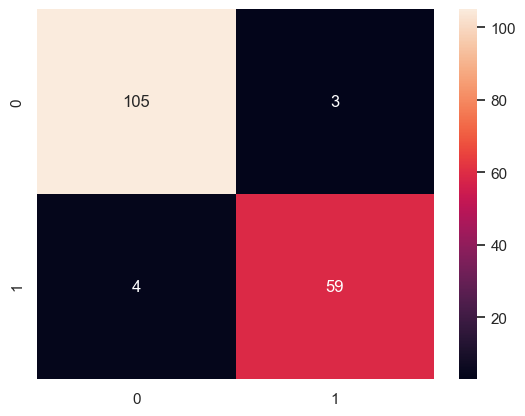

In [244]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

# randomforest classifier with n_estimators = 10(default)
ranfor_2 = RandomForestClassifier()
ranfor_2.fit(x_train_2, y_train)
y_pred_2 = ranfor_2.predict(x_test_2)

acc_2 = accuracy_score(y_test, y_pred_2)
print('Accuray is: ', acc_2)
cf_mat_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cf_mat_2, annot = True, fmt = "d")

In [245]:
# 3) recursive feature elimination(REF) with randomforest
# create the RFE object and rank each pixel
ranfor_3 = RandomForestClassifier()
rfe = RFE(estimator = ranfor_3, n_features_to_select = 5, step = 1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe: ', x_train.columns[rfe.support_])

Chosen best 5 feature by rfe:  Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


In [246]:
# recursive feature elimination with cross validation and randomforest classification
ranfor_4 = RandomForestClassifier()
rfecv = RFECV(estimator = ranfor_4, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features : ', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features :  15
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


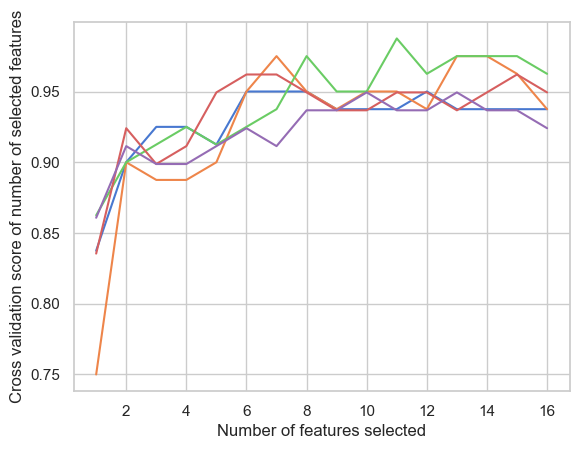

In [247]:
# plot number of features VS cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score of number of selected features')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking: 
1. feature 3 (0.191208)
2. feature 1 (0.182600)
3. feature 7 (0.159336)
4. feature 13 (0.147709)
5. feature 9 (0.058372)
6. feature 0 (0.051272)
7. feature 14 (0.048547)
8. feature 12 (0.032823)
9. feature 2 (0.025111)
10. feature 5 (0.021606)
11. feature 11 (0.018196)
12. feature 15 (0.017129)
13. feature 8 (0.014390)
14. feature 10 (0.010710)
15. feature 4 (0.010556)
16. feature 6 (0.010434)


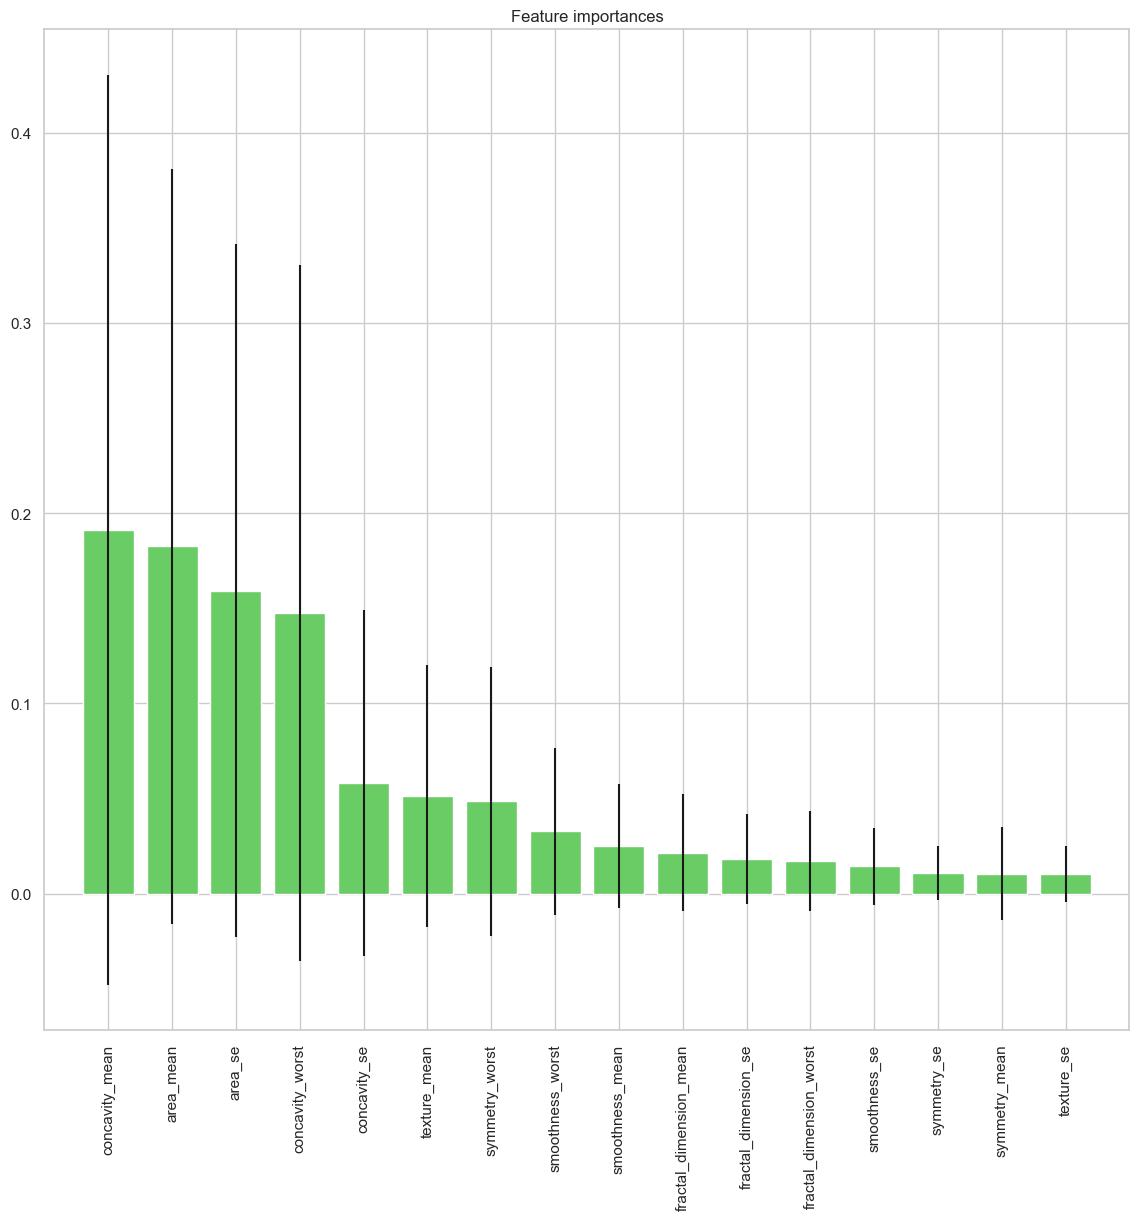

In [248]:
# 5) tree based feature selection and randomforest classification
ranfor_5 = RandomForestClassifier()
ranfor_5.fit(x_train, y_train)
importances = ranfor_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in ranfor_5.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print("Feature ranking: ")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# plot the feature importances of the forest
plt.figure(1, figsize = (14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color = "g", yerr = std[indices], align = "center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation = 90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Feature Extraction with PCA

Text(0, 0.5, 'explained_variance_ratio_')

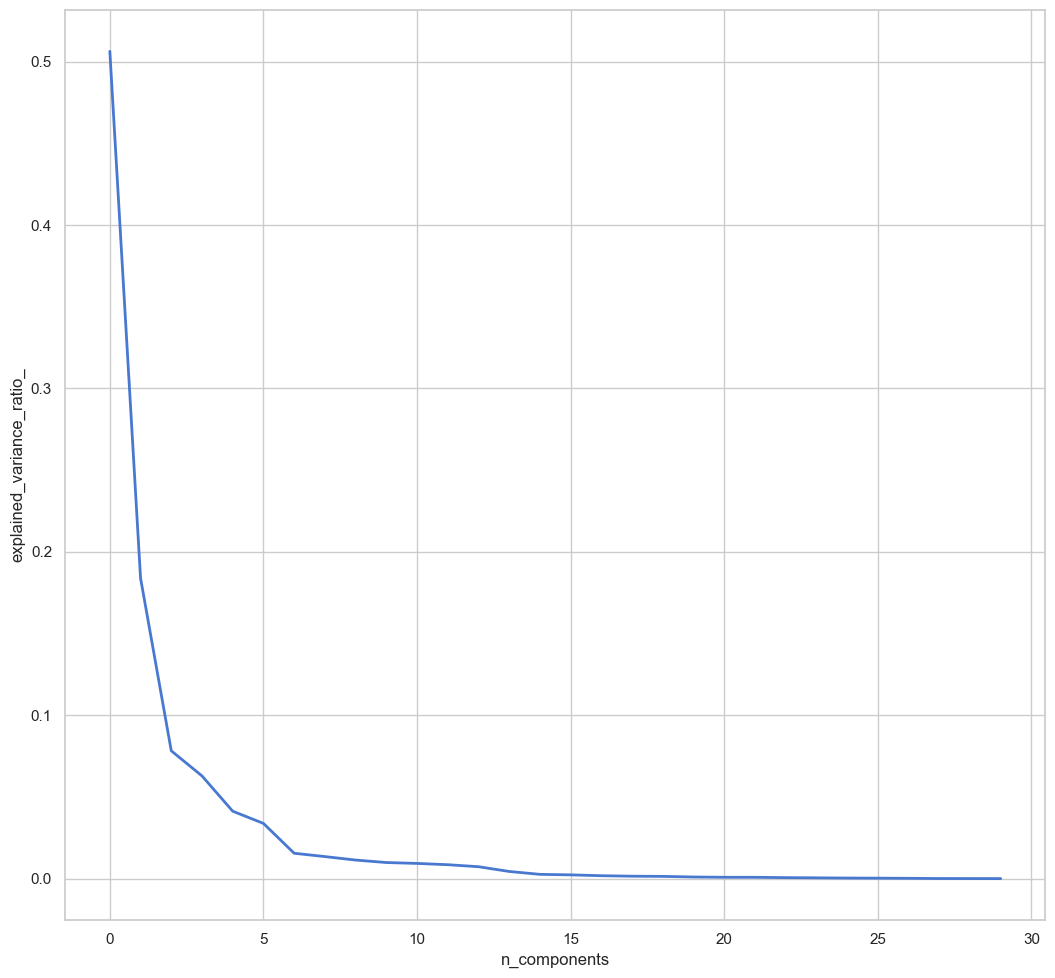

In [249]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# normalization
x_train_N = (x_train - x_train.mean())/(x_train.max() - x_train.min())
x_test_N = (x_test - x_test.mean())/(x_test.max() - x_test.min())

pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize = (14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth = 2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

###### * 아래 링크를 참고 했으며, 개인적인 공부를 위한 코드입니다.<br>참고) https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization